## Python Workshop Code
Code for the planetary exploration group Introductory Python Workshop

In [29]:
##Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

In [9]:
##Hello World and basic syntax
print ("Hello World")
var1 = "Hello World"
print (var1)
print (type(var1))
var2 = 4.23
var3 = 2
print (var2)
print (var3)
print (var2*var3)
print ("The type of var2 is",type(var2))
print ("The type of var3 is",type(var3))
var4 = int(var2)

Hello World
Hello World
<class 'str'>
4.23
2
8.46
The type of var2 is <class 'float'>
The type of var3 is <class 'int'>


4

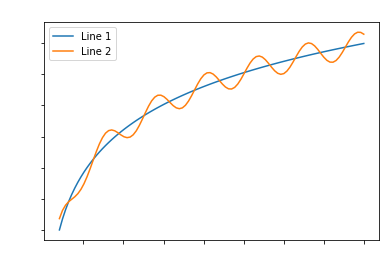

In [74]:
##Basic Plotting in matplotlib
x = np.linspace(1,20,100)
def func1(x):
    return np.log(x)
def func2(x):
    return np.log(x) + 0.2*np.sin(2*x)
y1 = func1(x)
y2 = func2(x)
plt.xticks(color="white")
plt.yticks(color="white")
plt.title("My Really Great Plot",color="white")
plt.xlabel("X Label",color="white")
plt.ylabel("Y Label",color = "white")
#plt.xscale("log")
plt.plot(x,y1,label="Line 1")
plt.plot(x,y2,label="Line 2")
plt.legend()


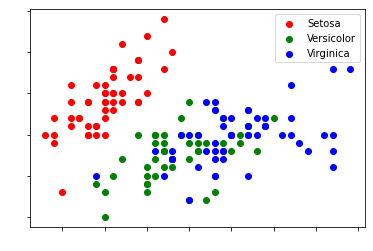

In [48]:
##Loading in data and making some basic plots
my_data = pd.read_csv(r"C:\Users\zacha\OneDrive\Desktop\iris.csv")

sepal_length = my_data["sepal.length"]
sepal_width = my_data["sepal.width"]
variety = my_data["variety"]

#plt.scatter(sepal_length,sepal_width)
plt.xticks(color="white")
plt.yticks(color="white")

variety_list = []
for i in variety:
    if i not in variety_list:
        variety_list.append(i)

for var_type,color in zip(variety_list,['red','green','blue']):
    x_list = []
    y_list = []
    for x,y,var in zip(sepal_length,sepal_width,variety):
        if var == var_type:
            x_list.append(x)
            y_list.append(y)
    plt.scatter(x_list,y_list,label=var_type,c=color)

plt.legend()

In [77]:
pip install spectral

Note: you may need to restart the kernel to use updated packages.


Number of Rows: 1017 
Number of Columns: 304 
Number of Bands: 85 
Number of Total Pixels: 309168
What wavelength do you want to plot? 1800
Plotting: 1818.4


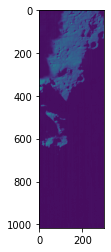

In [99]:
##Loading HDR Hyperspectral Image of the Moon
import spectral as sp
hdr = sp.envi.open(r"C:\Users\zacha\OneDrive\Desktop\M3_Sample Data\m3g20090417t193320_v01_rfl.hdr")
##Reading the number of pixels and number of spectral bands
print (f"Number of Rows: {hdr.nrows} \n"
        f"Number of Columns: {hdr.ncols} \n"
        f"Number of Bands: {hdr.nbands} \n"
        f"Number of Total Pixels: {hdr.nrows*hdr.ncols}")

##plotting one band of the image
def plot_hdr():
    wavelengths = hdr.bands.centers
    [float(i) for i in wavelengths]
    wav_to_plot = float(input("What wavelength do you want to plot? "))
    diff_list = []
    for i in wavelengths:
        diff_list.append(np.abs(wav_to_plot-i))
    ind = diff_list.index(np.min(diff_list))
    print (f"Plotting: {wavelengths[ind]}")
    band = hdr.read_band(ind)
    plt.imshow(band)
    
plot_hdr()